<a href="https://colab.research.google.com/github/das2002/Remote-Sensing-Beaverworks/blob/master/shortest_path.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# finding shortest path between A and B given accesible grids only
# convert game grid to networkx
# use networkx to find shortest path
# need to specify location of some certificates for rasterio
!export CURL_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt
!sudo mkdir -p /etc/pki/tls/certs
!sudo cp /etc/ssl/certs/ca-certificates.crt /etc/pki/tls/certs/ca-bundle.crt
try:
  import rasterio
  import rasterio.plot
  import rasterio.merge 
  import rasterio.mask
except:
  !pip install rasterio
  import rasterio
  import rasterio.plot
  import rasterio.merge
  import rasterio.mask
  
try:
  import rasterstats as rs
except:
  !pip install rasterstats  
  import rasterstats as rs
  
try:
  import pyproj
except:
  !pip install pyproj
  import pyproj
  
import networkx as nx
try:
  import osmnx as ox
except:
  # osmnx depends on the system package libspatialindex
  !apt install libspatialindex-dev
  !pip install osmnx
  import osmnx as ox

try: 
  import geopandas as gpd
except: 
  !pip install geopandas 
  import geopandas as gpd
  
try:
  import contextily as ctx 
except:
  # install dependencies for contextily
  !apt install libproj-dev proj-data proj-bin
  !apt install libgeos-dev
  !pip install cython
  !pip install cartopy
  # install contextily
  !pip install contextily==1.0rc1 --no-use-pep517 --no-cache-dir
  import contextily as ctx
  
import fiona
from shapely.geometry import Point, LineString, Polygon
  
import gdal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/'My Drive'/BWSI-Remote-Sensing/'Final_exercise'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/BWSI-Remote-Sensing/Final_exercise


In [0]:
!ls game_grid_export

facilities	      flooding.prj	       game_grid_all_stats.dbf
facilities_stats.csv  flooding.shp	       game_grid_all_stats.prj
flooding.cpg	      flooding.shx	       game_grid_all_stats.shp
flooding.dbf	      game_grid_all_stats.cpg  game_grid_all_stats.shx


In [0]:
flooding = gpd.read_file('game_grid_export/flooding.shp')
hospitals = gpd.read_file('game_grid_export/facilities/hospitals.shp')
game_grid = gpd.read_file('game_grid_export/game_grid_all_stats.shp')

flooding


,STATE_NAME,geometry
0,Massachusetts,"(POLYGON ((346110.5812 4691955.131, 346100.909..."
1,Massachusetts,"(POLYGON ((337708.194 4683993.8864, 337715.478..."
2,Massachusetts,"(POLYGON ((355224.140625 4597641.3125, 355216...."
3,Massachusetts,"(POLYGON ((322921.953125 4633233.1875, 322921...."
4,Massachusetts,"(POLYGON ((399313.96875 4659481.21875, 399359...."
5,Massachusetts,"(POLYGON ((412541.9140625 4582620.390625, 4125..."
6,Rhode Island,"(POLYGON ((313176.048828125 4620591.37109375, ..."
7,Massachusetts,"(POLYGON ((341062.3765 4688483.5283, 341048.39..."
8,Massachusetts,"(POLYGON ((346040 4691918.46875, 346035.96875 ..."
9,Rhode Island,"(POLYGON ((317042.796875 4615342.15625, 317047..."


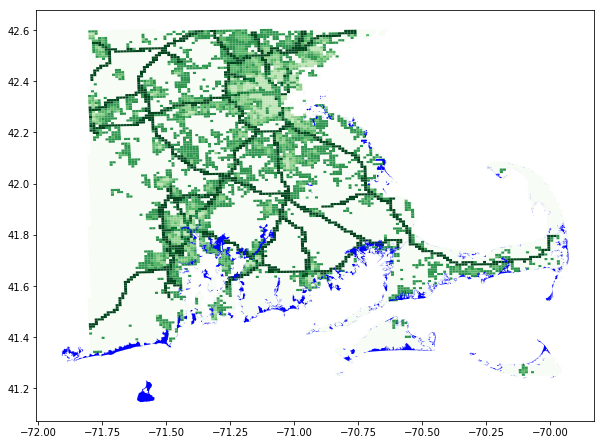

In [0]:
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(1,1,1)

game_grid.plot(ax=ax, column='Transporta',cmap='Greens')
flooding.to_crs(game_grid.crs).plot(color='blue', ax=ax)



In [0]:
new_geo = gpd.sjoin(game_grid, flooding.to_crs(game_grid.crs),  how = 'right',  op = 'intersects')


for item in new_geo['geometry']:
  if item in game_grid['geometry']:
    value = game_grid['geometry'].index(item)
    game_grid.at['Transporta', value] = 2
  
 
weight_list = game_grid['Transporta']
transport_score_list = 1/(game_grid['Transporta'])
transport_score_dict_list = [{'weight':x} for x in transport_score_list]




  
print(transport_score_dict_list)


#fig = plt.figure(figsize=[10, 10])
#ax = fig.add_subplot(1,1,1)
#new_geo.plot(ax=ax, column='Transporta',color = 'red')
new_geo['geometry'].to_crs(epsg=4326)


[{'weight': 0.125}, {'weight': 0.125}, {'weight': 0.125}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.2}, {'weight': 0.2}, {'weight': 0.125}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.3333333333333333}, {'weight': 0.333333333333

index_right
0     (POLYGON ((-70.86884904925785 42.3646449711218...
0     (POLYGON ((-70.86884904925785 42.3646449711218...
0     (POLYGON ((-70.86884904925785 42.3646449711218...
0     (POLYGON ((-70.86884904925785 42.3646449711218...
0     (POLYGON ((-70.86884904925785 42.3646449711218...
0     (POLYGON ((-70.86884904925785 42.3646449711218...
0     (POLYGON ((-70.86884904925785 42.3646449711218...
0     (POLYGON ((-70.86884904925785 42.3646449711218...
0     (POLYGON ((-70.86884904925785 42.3646449711218...
0     (POLYGON ((-70.86884904925785 42.3646449711218...
0     (POLYGON ((-70.86884904925785 42.3646449711218...
0     (POLYGON ((-70.86884904925785 42.3646449711218...
0     (POLYGON ((-70.86884904925785 42.3646449711218...
0     (POLYGON ((-70.86884904925785 42.3646449711218...
0     (POLYGON ((-70.86884904925785 42.3646449711218...
0     (POLYGON ((-70.86884904925785 42.3646449711218...
0     (POLYGON ((-70.86884904925785 42.3646449711218...
0     (POLYGON ((-70.86884904925785 

In [0]:
tuple_list = []
for index,row in game_grid.iterrows():
  neighbors = game_grid.loc[game_grid.geometry.touches(row['geometry'])].index.tolist()
  print(index, neighbors)
  for neighbor in neighbors:
    temp_tuple = (index, neighbor)
    print(temp_tuple)
    tuple_list.append(temp_tuple)

0 [1, 22, 23]
(0, 1)
(0, 22)
(0, 23)
1 [0, 2, 22, 23, 24]
(1, 0)
(1, 2)
(1, 22)
(1, 23)
(1, 24)
2 [1, 3, 23, 24, 25]
(2, 1)
(2, 3)
(2, 23)
(2, 24)
(2, 25)
3 [2, 4, 24, 25, 26]
(3, 2)
(3, 4)
(3, 24)
(3, 25)
(3, 26)
4 [3, 5, 25, 26, 27]
(4, 3)
(4, 5)
(4, 25)
(4, 26)
(4, 27)
5 [4, 6, 26, 27, 28]
(5, 4)
(5, 6)
(5, 26)
(5, 27)
(5, 28)
6 [5, 7, 27, 28, 29]
(6, 5)
(6, 7)
(6, 27)
(6, 28)
(6, 29)
7 [6, 8, 28, 29, 30]
(7, 6)
(7, 8)
(7, 28)
(7, 29)
(7, 30)
8 [7, 9, 29, 30, 31]
(8, 7)
(8, 9)
(8, 29)
(8, 30)
(8, 31)
9 [8, 10, 30, 31, 32]
(9, 8)
(9, 10)
(9, 30)
(9, 31)
(9, 32)
10 [9, 11, 31, 32, 33]
(10, 9)
(10, 11)
(10, 31)
(10, 32)
(10, 33)
11 [10, 12, 32, 33, 34]
(11, 10)
(11, 12)
(11, 32)
(11, 33)
(11, 34)
12 [11, 13, 33, 34, 35]
(12, 11)
(12, 13)
(12, 33)
(12, 34)
(12, 35)
13 [12, 14, 34, 35, 36]
(13, 12)
(13, 14)
(13, 34)
(13, 35)
(13, 36)
14 [13, 15, 35, 36, 37]
(14, 13)
(14, 15)
(14, 35)
(14, 36)
(14, 37)
15 [14, 16, 36, 37, 38]
(15, 14)
(15, 16)
(15, 36)
(15, 37)
(15, 38)
16 [15, 17, 37, 38

In [0]:
G = nx.MultiDiGraph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
new_tuple_list = []
for index,value in tuple_list:
  new_tuple_list.append((index, value, transport_score_dict_list[index]))
G.add_edges_from(new_tuple_list)
#nx.draw_networkx(G)

p = (nx.shortest_path(G, source=0, target=26))

#print(p)

shortest_tuple_list = []

for i in range((len(p)) - 1):
  shortest_tuple_list.append((p[i], p[i+1]))
  

Z = nx.MultiDiGraph()
  
#Z.add_edges_from(shortest_tuple_list)

#nx.draw_networkx(Z)



def calc_shortest_path(source_node, target_node, graph):
  p = nx.shortest_path(graph, source = source_node, target= target_node, method = "dijkstra", weight='weight')
  shortest_tuple_list = []
  for i in range((len(p)) - 1):
    shortest_tuple_list.append((p[i], p[i+1]))
  #Z = nx.MultiDiGraph()
  
  #Z.add_edges_from(shortest_tuple_list)

  #nx.draw_networkx(Z)
  
  
  #print(game_grid.iloc[[p]])
  
  return p
  
  
  
#calc_shortest_path(3, 897, G)


fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(1,1,1)

base = game_grid.plot(ax=ax, column='Transporta',cmap='Greens')


game_grid.iloc[calc_shortest_path(110, 2000, G)].plot(ax=base, color = 'red')

In [0]:
hospitals_with_grid = gpd.sjoin(game_grid, hospitals, how="right", op='contains')

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(1,1,1)

base = game_grid.plot(ax=ax, column='Transporta',cmap='Greens')



#hospitals_with_grid.plot(ax=base, column='Transporta', color = 'red')


weight_list = hospitals_with_grid['Transporta']
transport_score_list = 1/(hospitals_with_grid['Transporta'])
transport_score_dict_list = [{'weight':x} for x in transport_score_list]

G = nx.MultiDiGraph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
new_tuple_list = []
#for index,value in tuple_list:
#  new_tuple_list.append((index, value, transport_score_dict_list[index]))
#G.add_edges_from(new_tuple_list)

def calc_shortest_path(source_node, target_node, graph):
  p = nx.shortest_path(graph, source = source_node, target= target_node, method = "dijkstra", weight='weight')
  shortest_tuple_list = []
  for i in range((len(p)) - 1):
    shortest_tuple_list.append((p[i], p[i+1]))
  
  return p








game_grid.iloc[calc_shortest_path(688, 892, G)].plot(ax=base, color = 'red')





In [0]:
def shortest_path_final_func(dataframe, origin_node, target_node):
  tuple_list = []
  dataframe_with_grid = gpd.sjoin(game_grid, dataframe, how="right", op='intersects')
  dataframe_with_grid.reset_index
  for index,row in dataframe_with_grid.iterrows():
    neighbors = dataframe_with_grid.loc[dataframe_with_grid.geometry.touches(row['geometry'])].index.tolist()
    #print(index, neighbors)
    for neighbor in neighbors:
      temp_tuple = (index, neighbor)
      #print(temp_tuple)
      tuple_list.append(temp_tuple)
    
  weight_list = dataframe_with_grid['Transporta']
  transport_score_list = 1/(dataframe_with_grid['Transporta'])
  transport_score_dict_list = [{'weight':x} for x in transport_score_list]
  
  
  
  new_tuple_list = []
  for index,value in tuple_list:
    new_tuple_list.append((index, value, transport_score_dict_list[index]))
    
    
  G = nx.MultiDiGraph()
  G.add_edges_from(new_tuple_list)
    
  p = calc_shortest_path(origin_node, target_node, G)
  
  for idx in p:
    game_grid
  
  return p



shortest_path_final_func(hospitals, 688, 1313)




In [0]:
(game_grid.loc[9000:9004]).to_file('evacuation.shp')

In [0]:
cd /content

In [0]:
from google.colab import drive
drive.mount('/content/drive')